In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("EmployeeAttrition.csv")

<h2> EDA </h2>

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [5]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#check unique values in the column
print(df.apply(lambda col: col.unique()))

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

<Figure size 2000x2000 with 0 Axes>

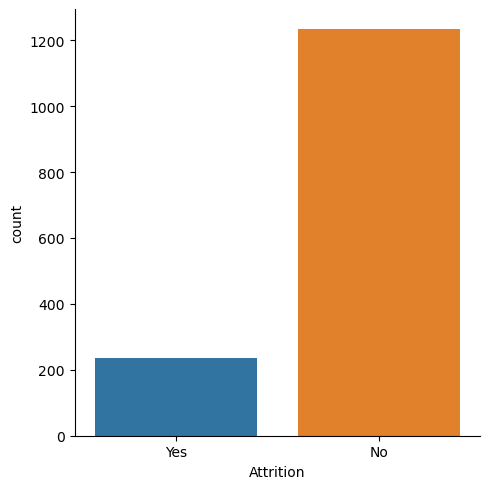

<Figure size 2000x2000 with 0 Axes>

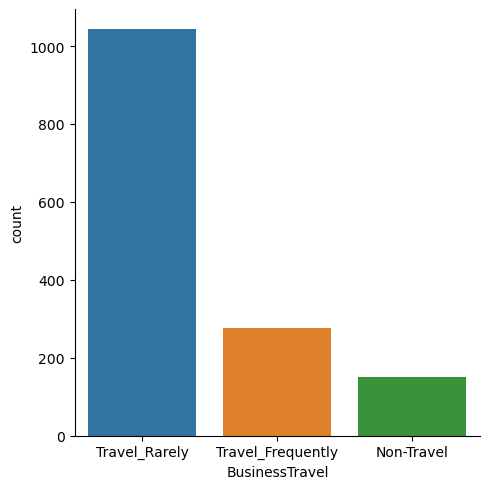

<Figure size 2000x2000 with 0 Axes>

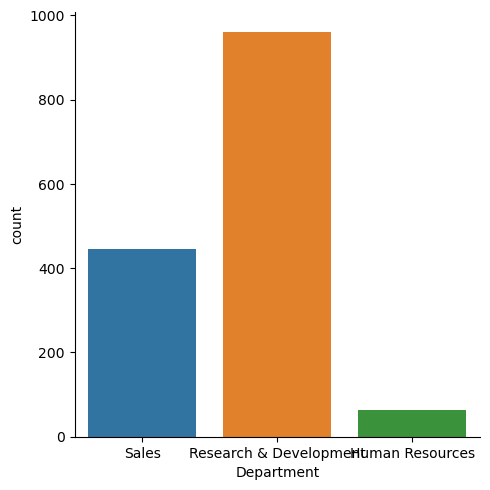

<Figure size 2000x2000 with 0 Axes>

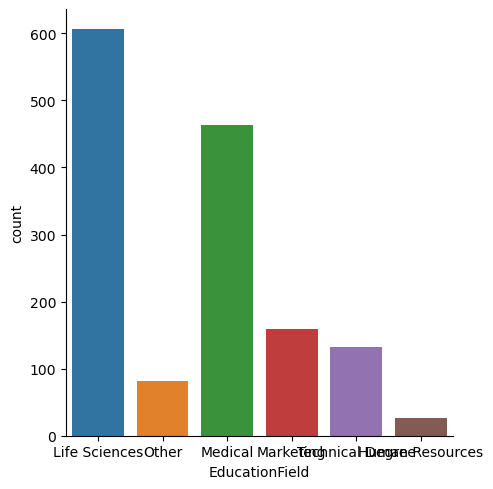

<Figure size 2000x2000 with 0 Axes>

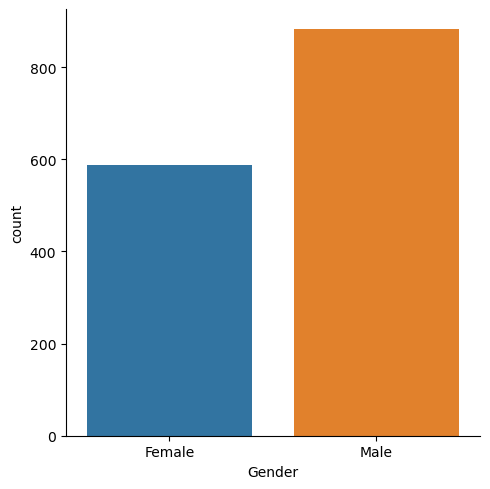

<Figure size 2000x2000 with 0 Axes>

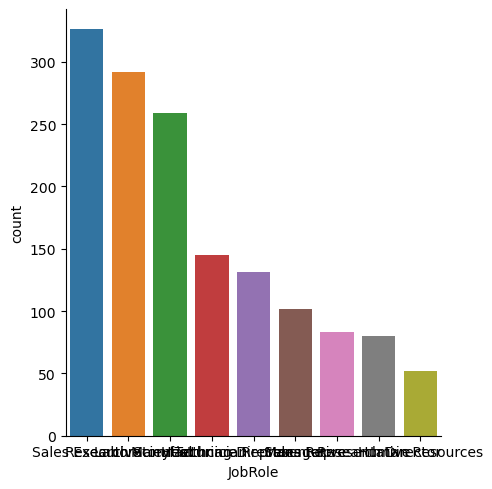

<Figure size 2000x2000 with 0 Axes>

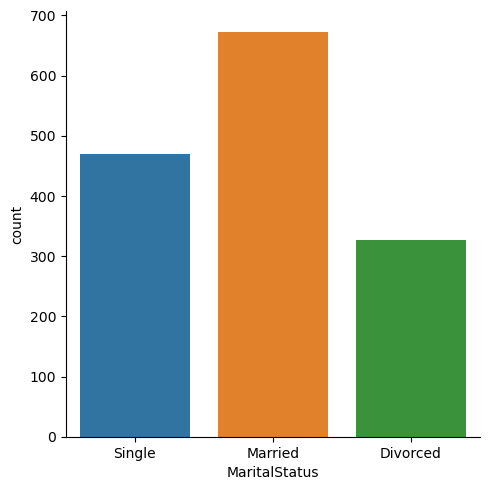

<Figure size 2000x2000 with 0 Axes>

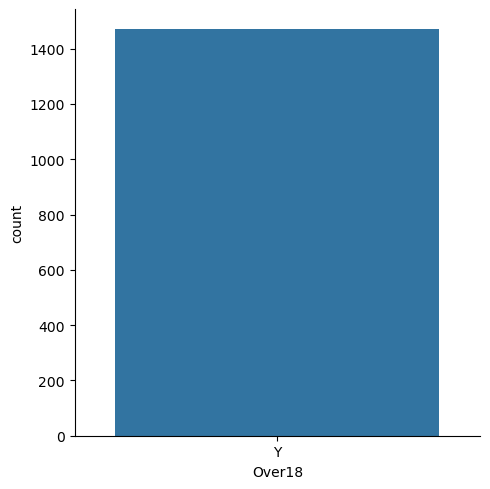

<Figure size 2000x2000 with 0 Axes>

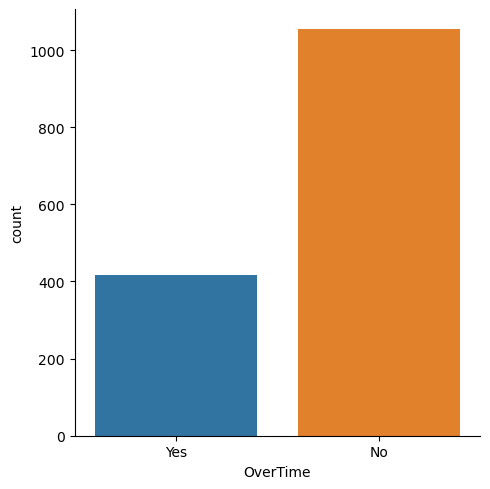

In [7]:
df_cat = df.select_dtypes(include = 'object')

for i in df_cat:
    plt.figure(figsize = (20,20))
    sns.catplot(data = df , x=i , kind = 'count')

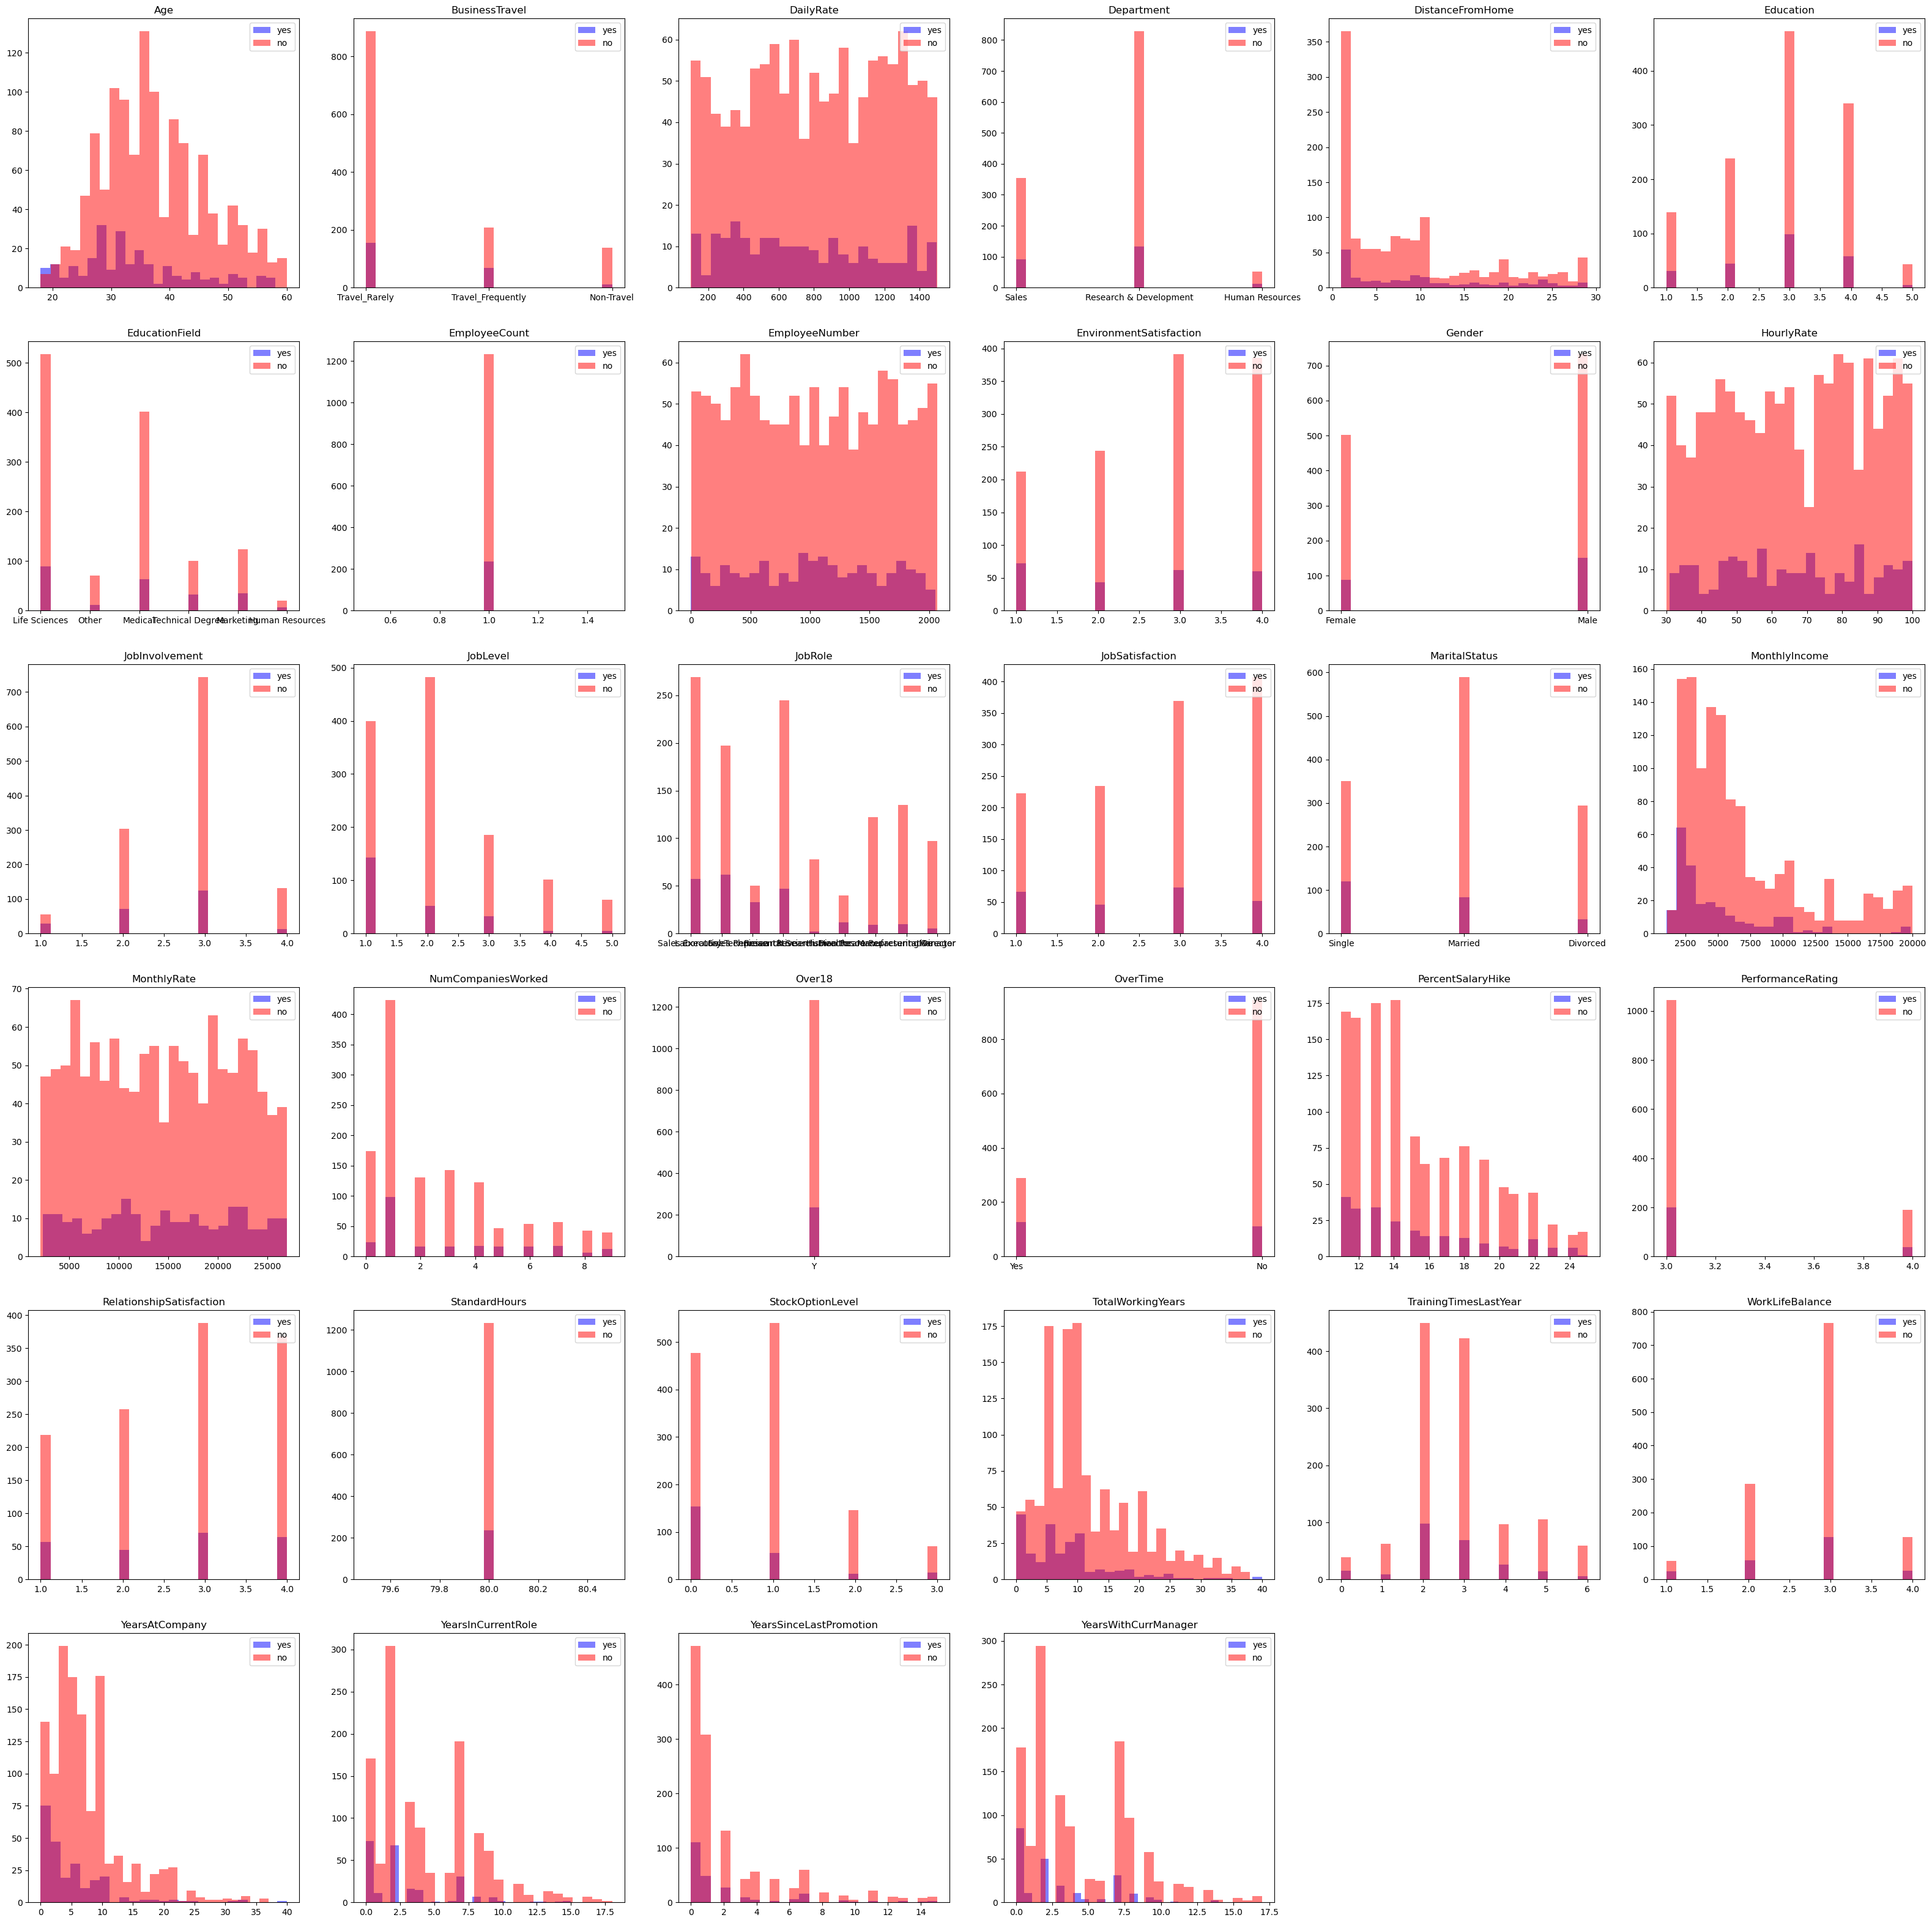

In [8]:
#plot distributions
k=1
plt.figure(figsize=(40, 40))
for col in df:
  if col=="Attrition":
    continue
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6,6 , k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

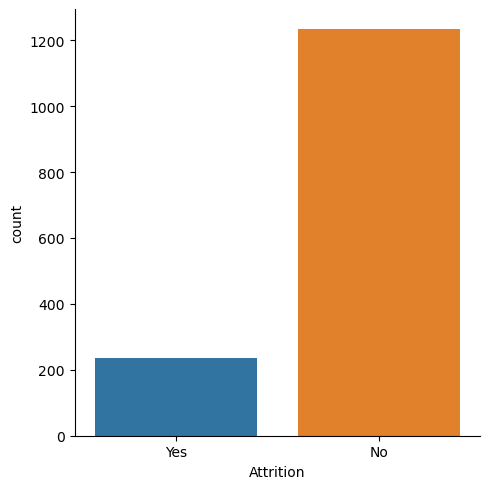

In [9]:
sns.catplot(data=df,x="Attrition",kind='count')

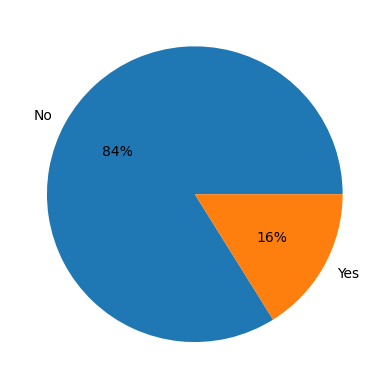

In [10]:
# colors = sns.color_palette("husl", 2)
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'], autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, 'Job Satisfaction vs Attrition')

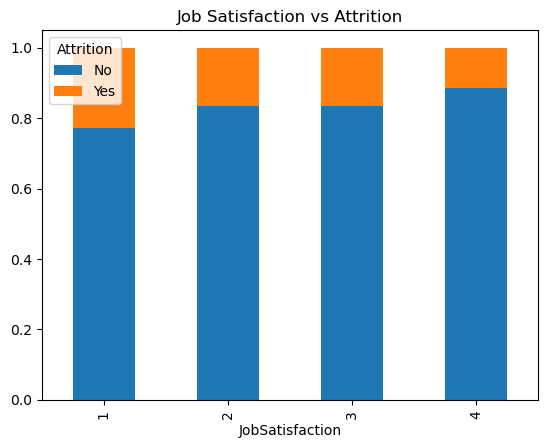

In [11]:
table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Job Satisfaction vs Attrition')

Text(0.5, 1.0, 'Overtime vs attrition')

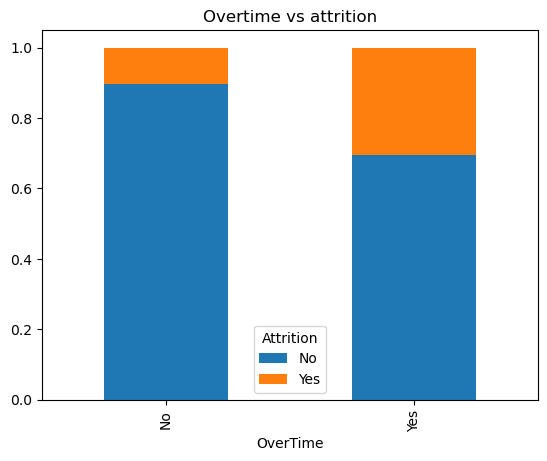

In [12]:
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Overtime vs attrition')

Text(0.5, 1.0, 'Business Travel vs attrition')

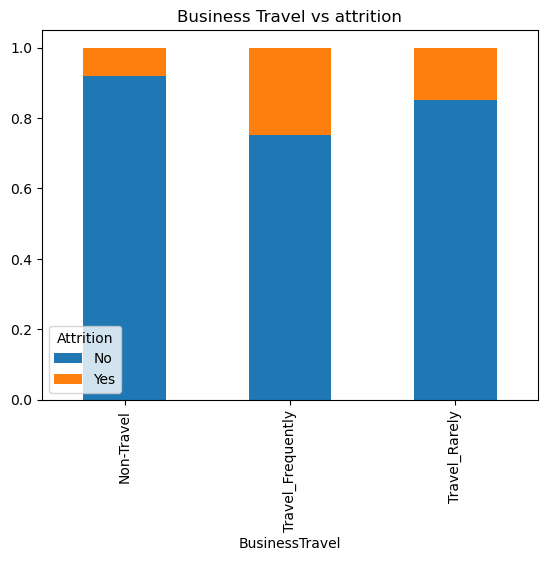

In [13]:
table=pd.crosstab(df.BusinessTravel, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Business Travel vs attrition')

Text(0.5, 1.0, 'Years Since Last Promotion vs attrition')

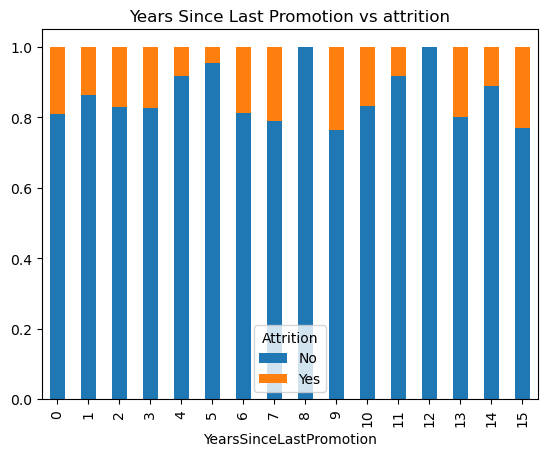

In [14]:
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Years Since Last Promotion vs attrition')

<Axes: >

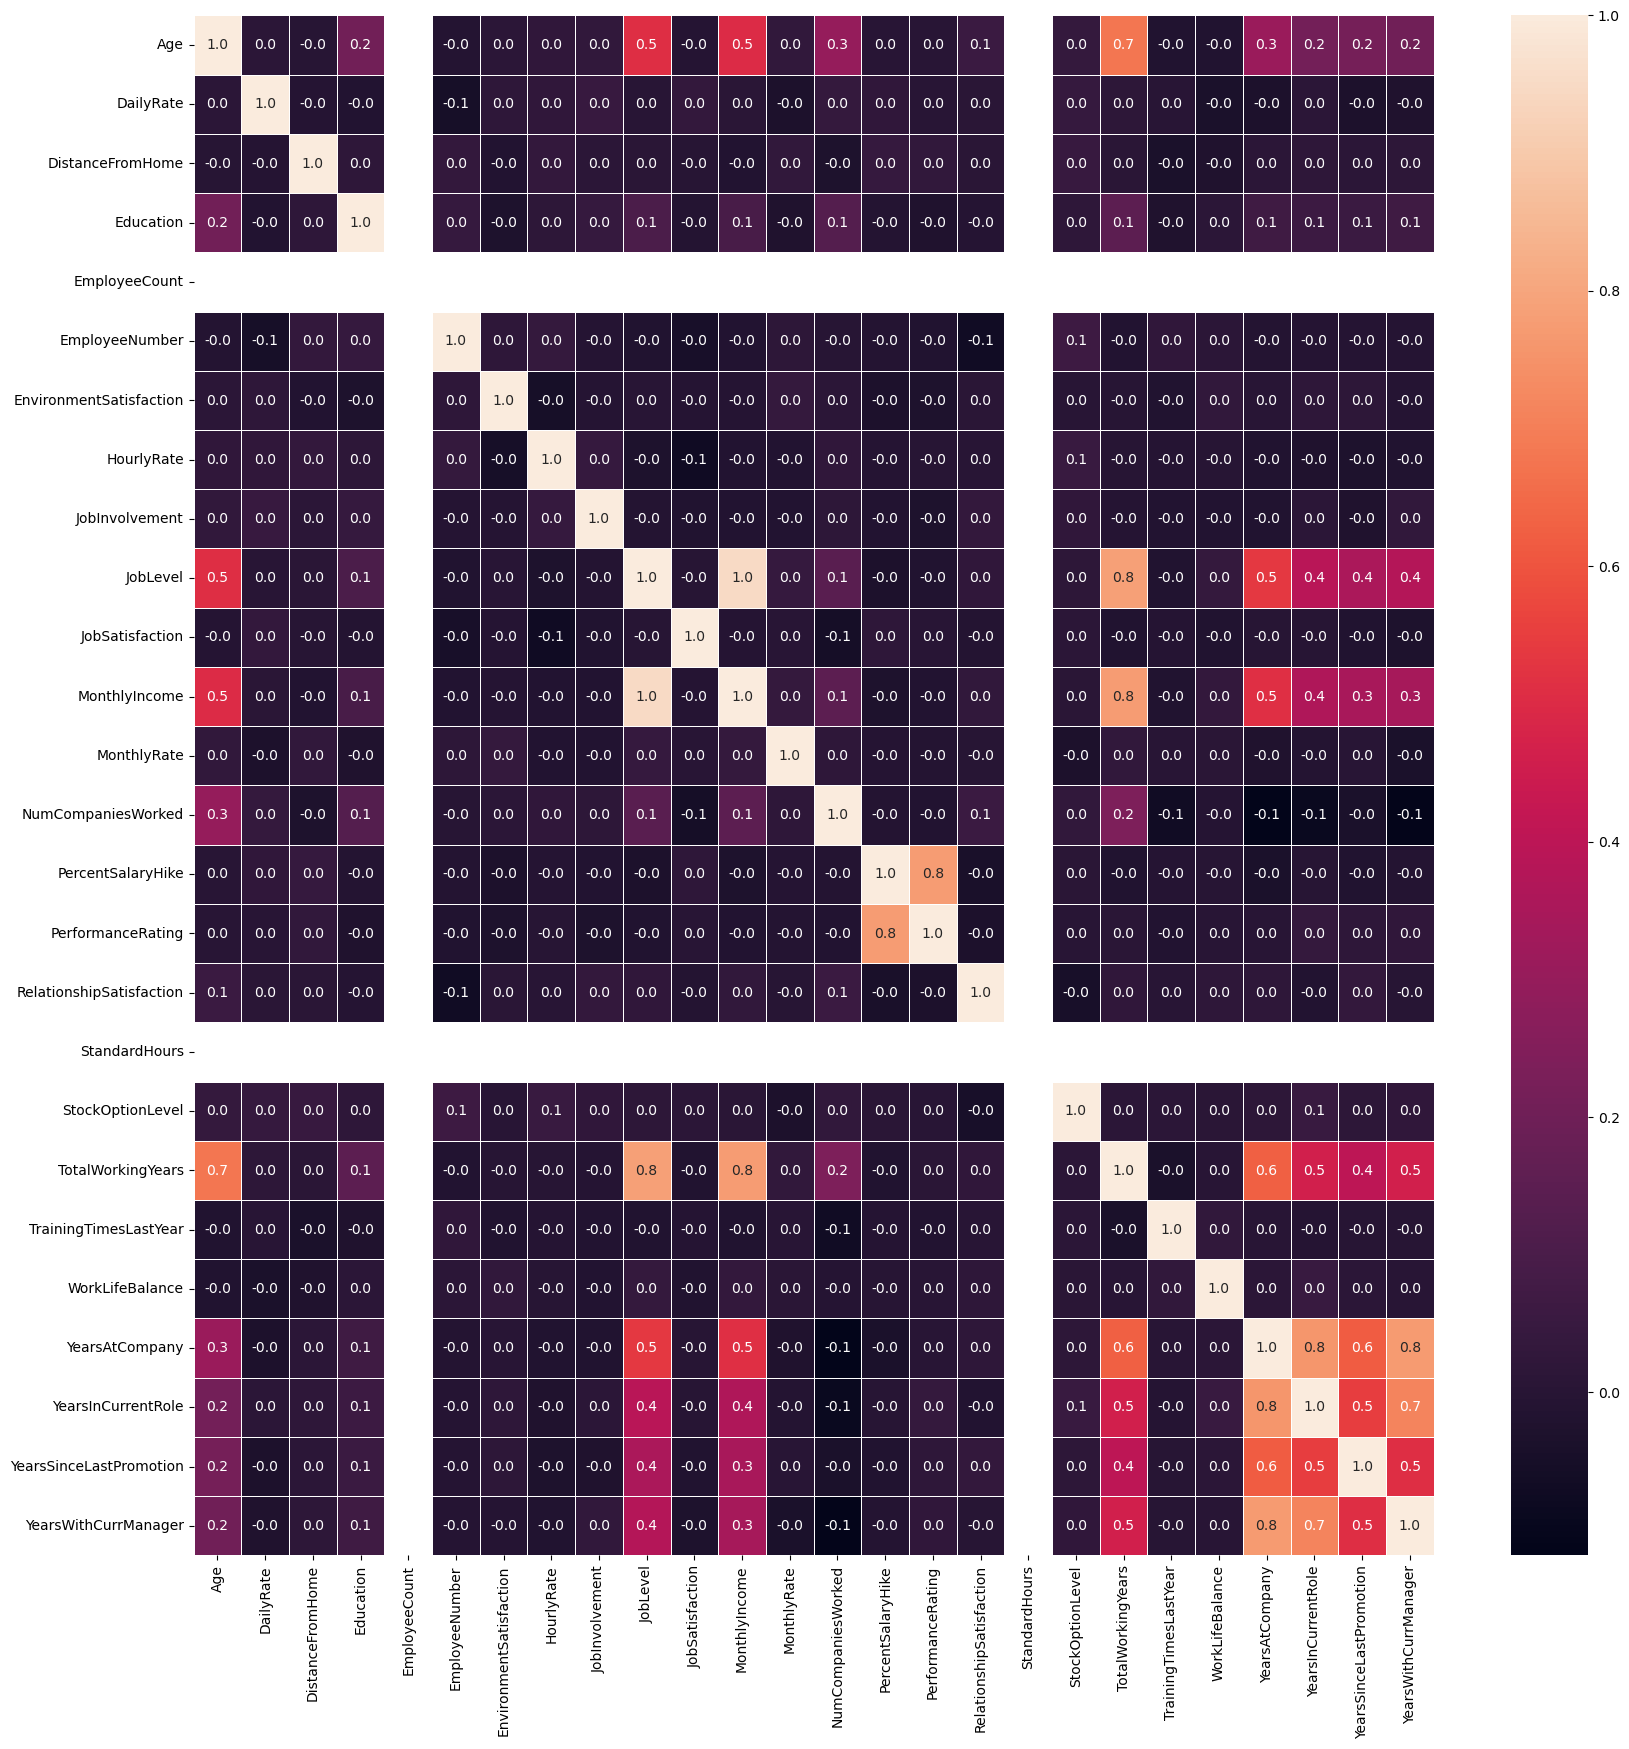

In [15]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

<Axes: xlabel='JobRole', ylabel='count'>

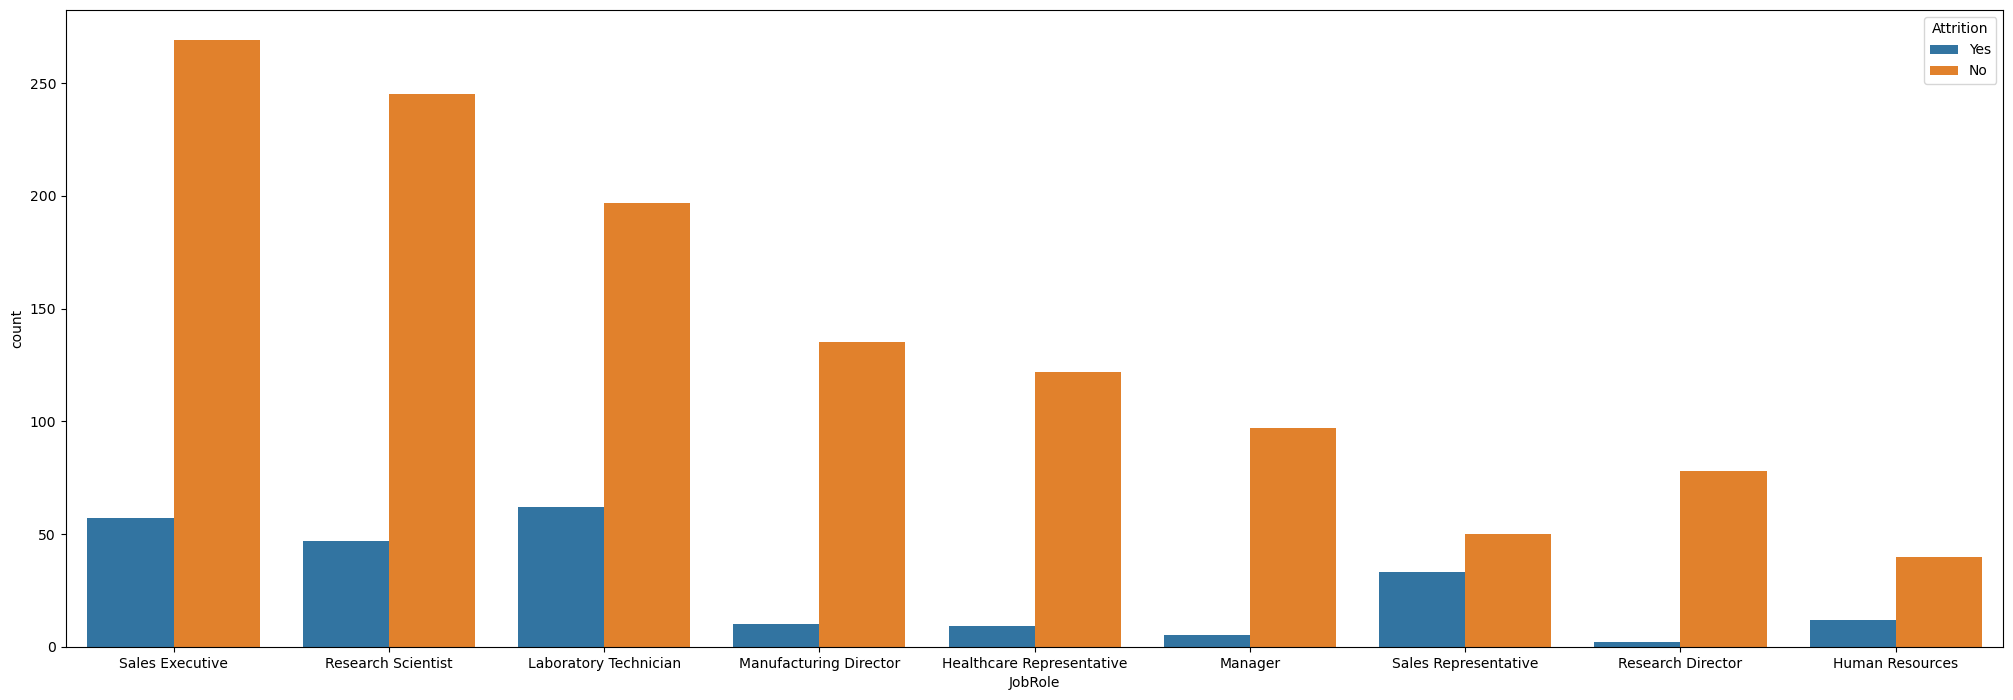

In [16]:
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="JobRole",hue="Attrition", ax=ax )

In [17]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,Y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,Y)
X2 = pd.DataFrame(X_,columns=X.columns)

<h2>Under Sampling</h2>

In [21]:
X= X1
Y= Y1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=1)

Two PCs explain [ 17.25880242  24.10291314  30.37131137  35.93786711  40.93144827
  45.55383789  49.54134683  53.49532689  57.35022215  61.06698758
  64.64838913  68.08897262  71.30312644  74.42474255  77.47438525
  80.43537835  83.18882794  85.72604388  88.02815577  90.27657557
  92.46593119  94.12575527  95.48462761  96.5161084   97.48108182
  98.20885988  98.85246267  99.46561429  99.87127071 100.        ] % of variance cumulatively


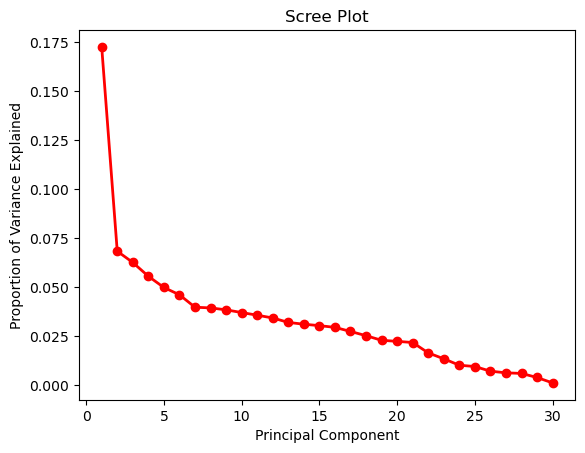

In [22]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
standard_scaler = StandardScaler()
principalComponents = pca.fit_transform(standard_scaler.fit_transform(x_train))
# print(pca.explained_variance_ratio_)
print('Two PCs explain', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.71149028 0.28616394]
Two PCs explain  99.76542171370907 % of variance cumulatively


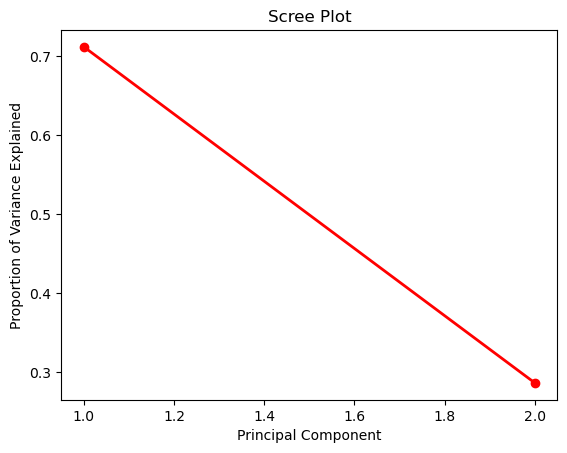

In [23]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(x_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [24]:
x_train = principalComponents
x_test = pca.transform(x_test)

<h2> ML- Naive Bayes </h2>

In [25]:
from sklearn.naive_bayes import ComplementNB,GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [26]:
print(x_test.shape)

(95, 2)


In [27]:
predicted=model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, roc_auc_score
cnf_matrix =confusion_matrix(y_test, predicted)
print("Accuracy Score -", accuracy_score(y_test , predicted))

Accuracy Score - 0.5368421052631579


In [29]:
from sklearn.metrics import classification_report,accuracy_score,precision_score, roc_curve, roc_auc_score
print(classification_report(y_test, predicted))
print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.54      0.28      0.37        46
           1       0.54      0.78      0.63        49

    accuracy                           0.54        95
   macro avg       0.54      0.53      0.50        95
weighted avg       0.54      0.54      0.51        95

0.5368421052631579
0.5352112676056338


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ",np.mean(scores['test_accuracy']))
  print("Precision: ",np.mean(scores['test_precision']))
  print("Recall: ",np.mean(scores['test_recall']))
  print("F1 Score: ",np.mean(scores['test_f1']))

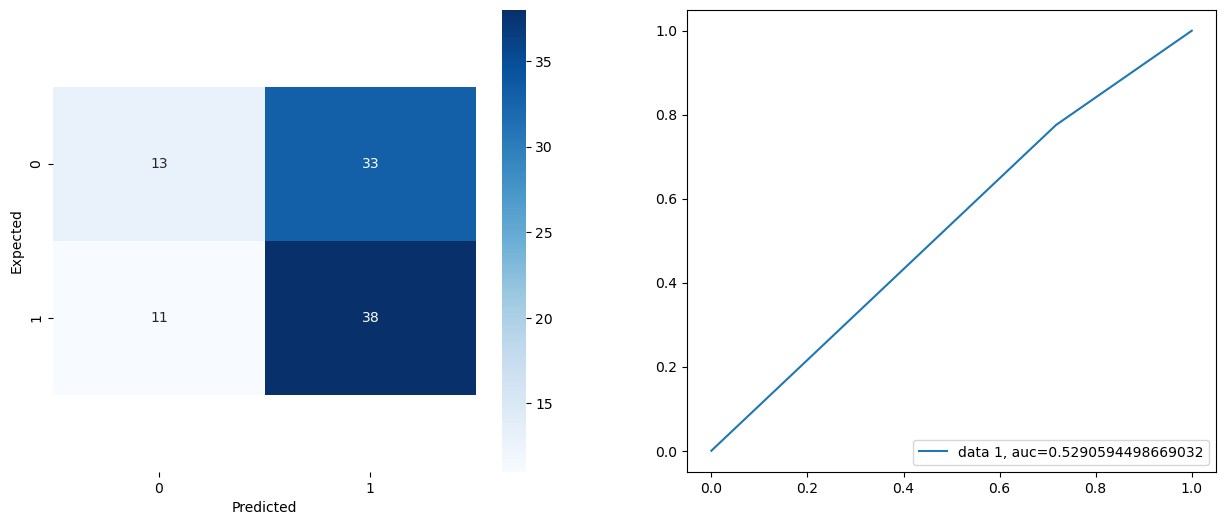

In [31]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test,  predicted)
auc = roc_auc_score(y_test, predicted)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
cross_validation(GaussianNB(),X,Y)

{'fit_time': array([0.00598407, 0.00370479, 0.00516176, 0.00510931, 0.00496054]), 'score_time': array([0.00412679, 0.00183368, 0.00179434, 0.00197768, 0.00172997]), 'test_accuracy': array([0.63157895, 0.72631579, 0.65263158, 0.62105263, 0.63829787]), 'test_precision': array([0.59375   , 0.6779661 , 0.62711864, 0.60344828, 0.61818182]), 'test_recall': array([0.80851064, 0.85106383, 0.77083333, 0.72916667, 0.72340426]), 'test_f1': array([0.68468468, 0.75471698, 0.69158879, 0.66037736, 0.66666667])}
Accuracy:  0.6539753639417694
Precision:  0.6240929679613199
Recall:  0.776595744680851
F1 Score:  0.6916068952041444


<h2></h2>

<h2></h2>

<h2></h2>

<h2></h2>

<h1>ML- KNN
</h1>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from sklearn.decomposition import PCA

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [35]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,Y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,Y)
X2 = pd.DataFrame(X_,columns=X.columns)

<h2>UnderSampling</h2>

In [36]:
X=X1
Y=Y1

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

20 PCs explain  [67.61411499 99.76067506] % of variance cumulatively


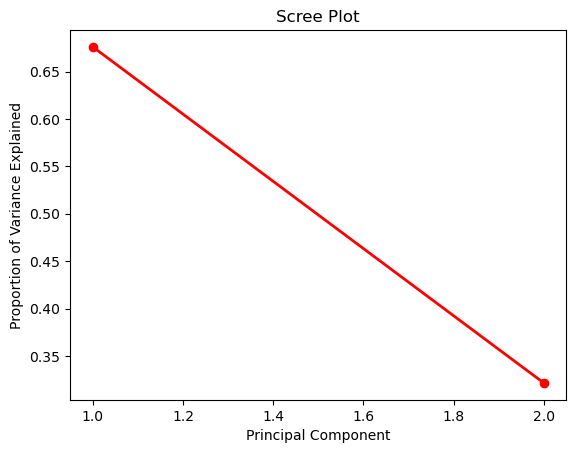

In [38]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

20 PCs explain  [17.45688436 24.97072295 31.36073545 37.58356086 42.65915971 47.45342902
 51.66800081 55.79668545 59.76891477 63.50653894 67.10302825 70.24036673
 73.30257004 76.20683308 79.02844384 81.73319659 84.40542658 86.82388579
 89.15729362 91.16638192] % of variance cumulatively


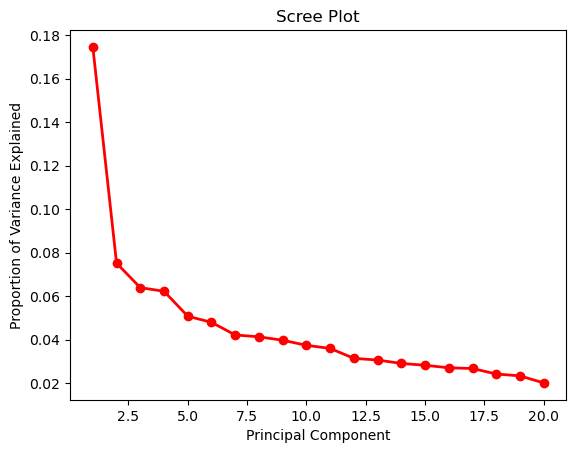

In [39]:
#standardization
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

17 PCs explain  [11.75797818 21.14934792 29.82173992 37.77586499 44.14710339 49.72862326
 54.97525424 59.78015606 64.25832215 68.53891109 72.45977366 75.58940958
 78.4632685  81.18748383 83.74120928 86.17344833 88.36389055] % of variance cumulatively


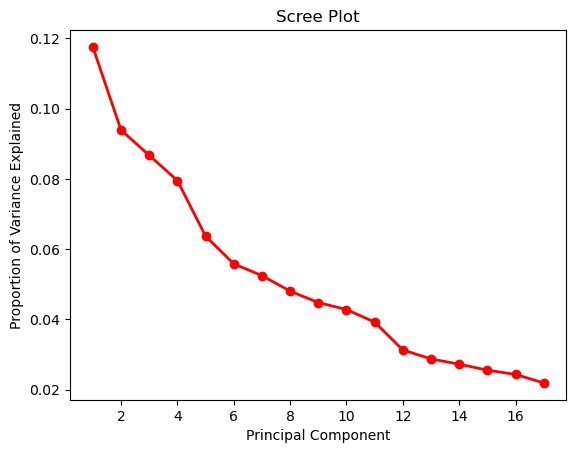

In [40]:
#Normalization
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

In [41]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

In [42]:
# Hyperparameter tuning using GridSearchCV
def tune_hyperparameters(model,X,Y):
  param_grid = {
      'n_neighbors' : np.arange(5,20,2),
      'leaf_size' : np.arange(1,50,5),
      'weights' : ['uniform','distance']
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,Y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [43]:
#without scaling
best_parameters_raw = tune_hyperparameters(KNeighborsClassifier(),X_train,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}


In [44]:
#with standardization
best_parameters_std = tune_hyperparameters(KNeighborsClassifier(),X_train_standardized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 17, 'weights': 'distance'}


In [45]:
#with normalization
best_parameters_norm = tune_hyperparameters(KNeighborsClassifier(),X_train_normalized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}


In [46]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

Accuracy:  0.7902097902097902
Precision:  0.8
Recall:  0.8
F1 Score:  0.8000000000000002
Confusion Matrix:
 [[53 15]
 [15 60]]


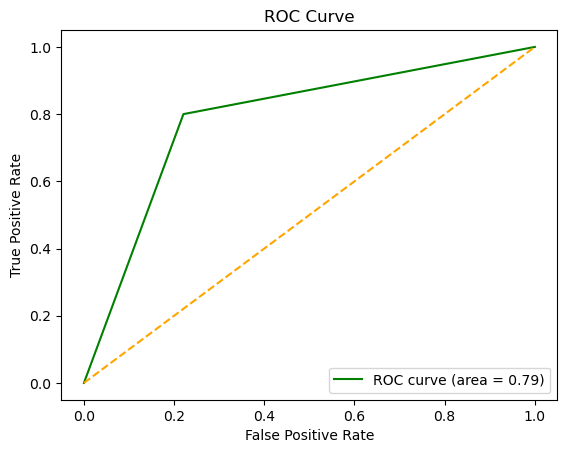

In [47]:
#without scaling
train_predict_evaluate(KNeighborsClassifier(**best_parameters_raw),X_train,y_train,X_test)

Accuracy:  0.7762237762237763
Precision:  0.7866666666666666
Recall:  0.7866666666666666
F1 Score:  0.7866666666666666
Confusion Matrix:
 [[52 16]
 [16 59]]


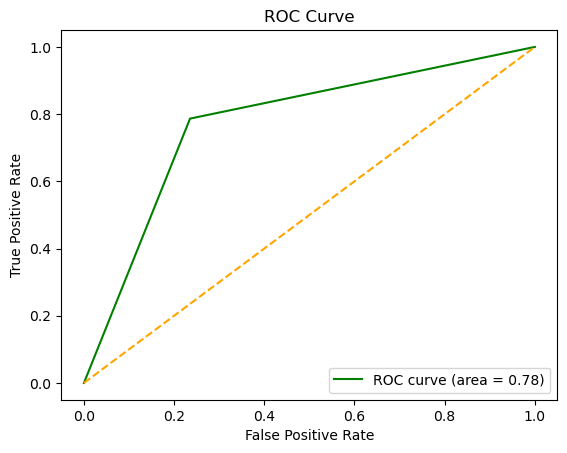

In [48]:
#with standardization
train_predict_evaluate(KNeighborsClassifier(**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

Accuracy:  0.8531468531468531
Precision:  0.8461538461538461
Recall:  0.88
F1 Score:  0.8627450980392156
Confusion Matrix:
 [[56 12]
 [ 9 66]]


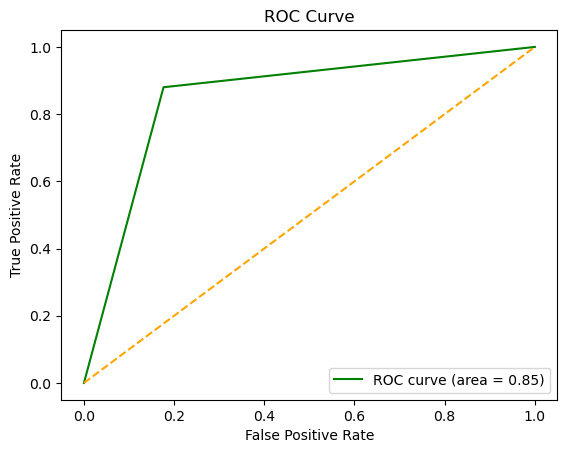

In [49]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

In [50]:
#K Fold cross validation
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [51]:
metrics = []

#without scaling
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_raw),X,Y))

Accuracy:  0.7320716685330348
Precision:  0.7153594870951178
Recall:  0.7761524822695035
F1 Score:  0.7437404971965508


In [52]:
#with Standardization
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_std),X_standardized,Y))

Accuracy:  0.8080851063829787
Precision:  0.8015499880059151
Recall:  0.8183510638297872
F1 Score:  0.8093301548199552


In [53]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_norm),X_normalized,Y))

Accuracy:  0.8270996640537515
Precision:  0.8168512527451768
Recall:  0.8441489361702128
F1 Score:  0.8295621729094773


In [54]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

Accuracy  Precision    Recall  F1 Score
Without Scaling       0.732072   0.715359  0.776152  0.743740
With Standardization  0.808085   0.801550  0.818351  0.809330
With Normalization    0.827100   0.816851  0.844149  0.829562

<h2>OverSampling</h2>

In [55]:
X=X2
Y=Y2

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

20 PCs explain  [70.74068688 99.76281581] % of variance cumulatively


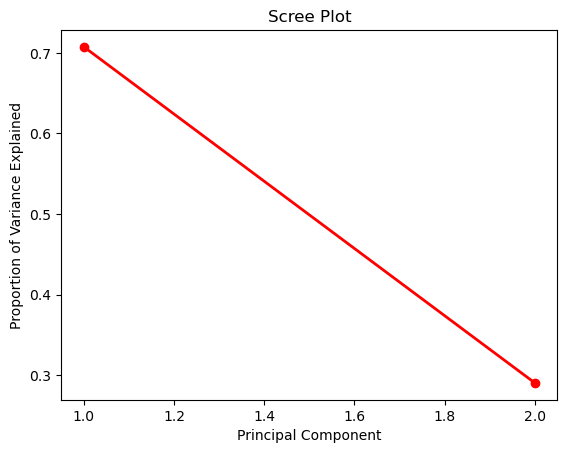

In [57]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

20 PCs explain  [17.44555167 24.44074193 30.65901903 36.38446522 41.40488981 46.19338821
 50.24580214 54.14136646 57.92204534 61.55864087 65.17124382 68.54778693
 71.79236823 74.88825386 77.83767848 80.70137862 83.37833712 85.93647278
 88.25925916 90.54980649] % of variance cumulatively


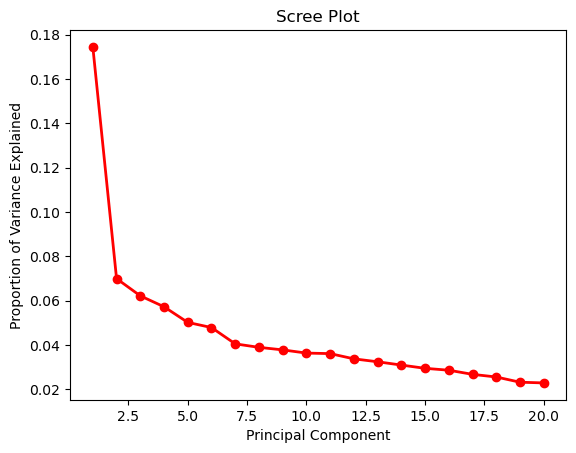

In [58]:
#standardization
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

17 PCs explain  [11.52097344 20.44330143 28.67985327 36.31753724 42.61134166 48.23334781
 53.36701768 58.09955124 62.64094633 66.81234597 70.37901588 73.84498837
 77.15158301 79.93520506 82.65007667 85.17122704 87.59414783] % of variance cumulatively


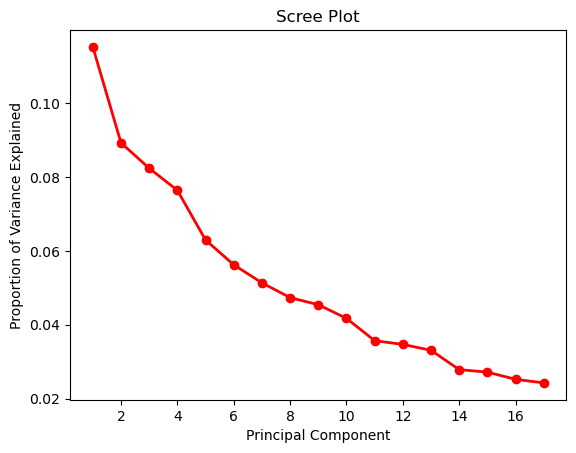

In [59]:
#normalization
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

In [60]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

In [61]:
def tune_hyperparameters(model,X,Y):
  param_grid = {
      'n_neighbors' : np.arange(5,20,2),
      'leaf_size' : np.arange(1,50,5),
      'weights' : ['uniform','distance']
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,Y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [62]:
best_parameters_raw = tune_hyperparameters(KNeighborsClassifier(),X_train,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'}


In [63]:
best_parameters_std = tune_hyperparameters(KNeighborsClassifier(),X_train_standardized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 11, 'weights': 'distance'}


In [64]:
best_parameters_norm = tune_hyperparameters(KNeighborsClassifier(),X_train_normalized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 17, 'weights': 'distance'}


In [65]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

Accuracy:  0.5944055944055944
Precision:  0.639344262295082
Recall:  0.52
F1 Score:  0.573529411764706
Confusion Matrix:
 [[46 22]
 [36 39]]


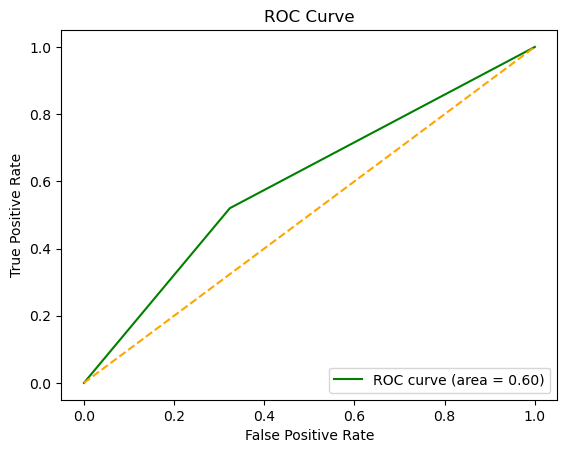

In [66]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_raw),X_train,y_train,X_test)

Accuracy:  0.6643356643356644
Precision:  0.8
Recall:  0.48
F1 Score:  0.6
Confusion Matrix:
 [[59  9]
 [39 36]]


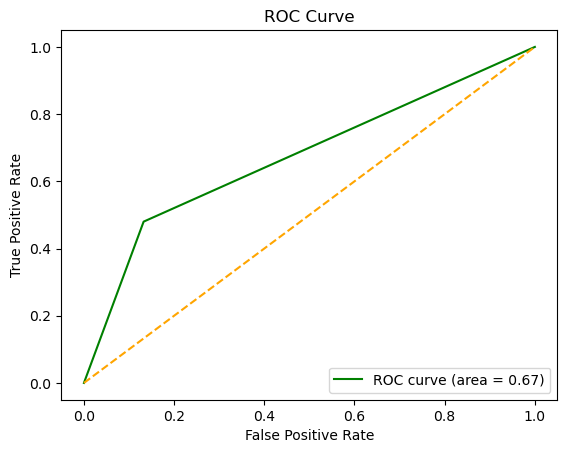

In [67]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

Accuracy:  0.7482517482517482
Precision:  0.819672131147541
Recall:  0.6666666666666666
F1 Score:  0.7352941176470588
Confusion Matrix:
 [[57 11]
 [25 50]]


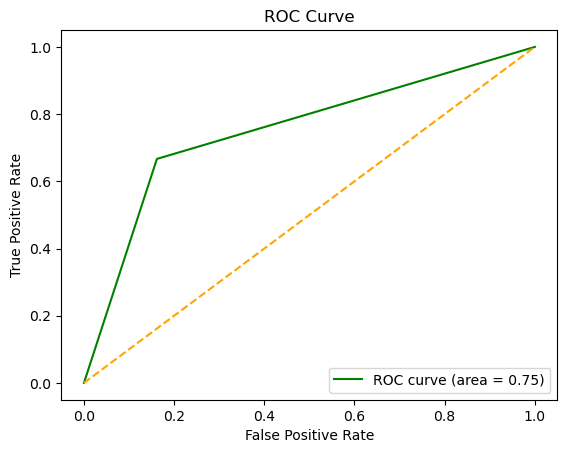

In [68]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

In [69]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [70]:
metrics = []
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_raw),X,Y))

Accuracy:  0.5802463605823068
Precision:  0.5820354756519828
Recall:  0.5728723404255319
F1 Score:  0.5702367649441427


In [71]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_std),X_standardized,Y))

Accuracy:  0.6730123180291153
Precision:  0.7414311179017062
Recall:  0.5319148936170213
F1 Score:  0.6193691659138814


In [72]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_norm),X_normalized,Y))

Accuracy:  0.7047256438969765
Precision:  0.7347264618937058
Recall:  0.6458333333333333
F1 Score:  0.6865049805326896


In [73]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()


Accuracy  Precision    Recall  F1 Score
Without Scaling       0.580246   0.582035  0.572872  0.570237
With Standardization  0.673012   0.741431  0.531915  0.619369
With Normalization    0.704726   0.734726  0.645833  0.686505

<h1>

<h1>

<h1>

<h2>ADA BOOST</h2>

<h2>UnderSampling</h2>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from sklearn.decomposition import PCA

In [75]:
X = X1
Y = Y1

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

[0.17456884 0.07513839 0.06390013 0.06222825 0.05075599 0.04794269
 0.04214572 0.04128685 0.03972229 0.03737624 0.03596489 0.03137338
 0.03062203 0.02904263 0.02821611 0.02704753 0.0267223  0.02418459
 0.02333408 0.02009088 0.01831717]
Twenty one PCs explain 92.99809891527383 % of variance cumulatively


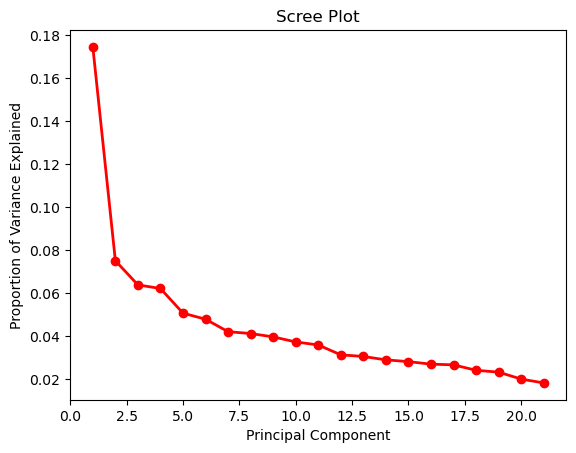

In [77]:
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=21, random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Twenty one PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [78]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y_train)
fig.show()
X_train = principalComponents
X_test = pca.transform(X_test)

In [86]:
def tune_hyperparameters(model,X,Y):
  param_grid = {
      'n_estimators' : [10,50,250,1000],
      'learning_rate' : [0.001,0.01,0.1,1.0,10]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,Y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [87]:
decision_tree_parameters = {'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.33334, 'max_leaf_nodes': 50, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 0}

In [88]:
best_parameters_raw = tune_hyperparameters(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters)),X_train,y_train)

Best Params:  {'learning_rate': 0.01, 'n_estimators': 1000}


In [89]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

Accuracy:  0.45454545454545453
Precision:  0.43478260869565216
Recall:  0.13333333333333333
F1 Score:  0.20408163265306123
Confusion Matrix:
 [[55 13]
 [65 10]]


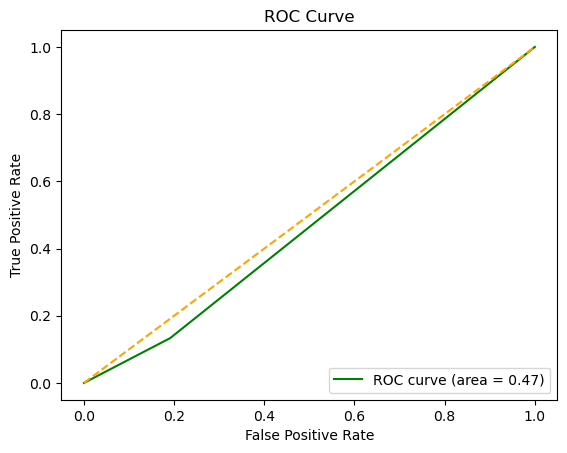

In [90]:
train_predict_evaluate(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X_train,y_train,X_test)

In [91]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

In [92]:
cross_validation(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X,Y)

Accuracy:  0.8227995520716685
Precision:  0.8231748758707923
Recall:  0.8227836879432624
F1 Score:  0.8227930197835013


<h2>OverSampling</h2>

In [111]:
X=X2
Y=Y2
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

[0.17445552 0.0699519  0.06218277 0.05725446 0.05020425 0.04788498
 0.04052414 0.03895564 0.03780679 0.03636596 0.03612603 0.03376543
 0.03244581 0.03095886 0.02949425 0.028637   0.02676959 0.02558136
 0.02322786 0.02290547 0.02084384]
Two PCs explain 92.63419045181885 % of variance cumulatively


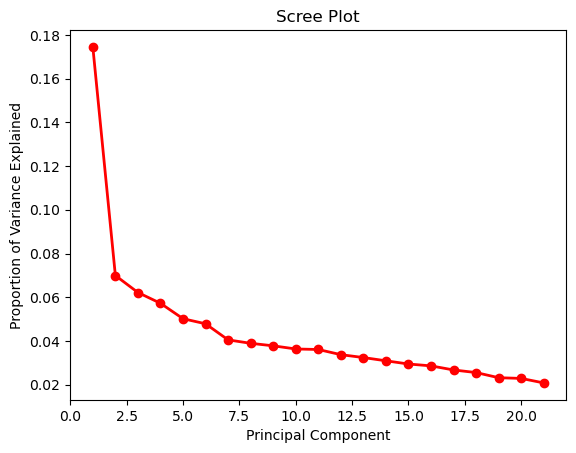

In [112]:
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=21, random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Two PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [113]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y_train)
fig.show()
X_train = principalComponents
X_test = pca.transform(X_test)

In [114]:
def tune_hyperparameters(model,X,Y):
  param_grid = {
      'n_estimators' : [10,50,250,1000],
      'learning_rate' : [0.001,0.01,0.1,1.0,10]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,Y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [115]:
decision_tree_parameters = {'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.33334, 'max_leaf_nodes': 50, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 0}

In [116]:
best_parameters_raw = tune_hyperparameters(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters)),X_train,y_train)

Best Params:  {'learning_rate': 1.0, 'n_estimators': 1000}


In [117]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

Accuracy:  0.5594405594405595
Precision:  0.5441176470588235
Recall:  0.9866666666666667
F1 Score:  0.7014218009478673
Confusion Matrix:
 [[ 6 62]
 [ 1 74]]


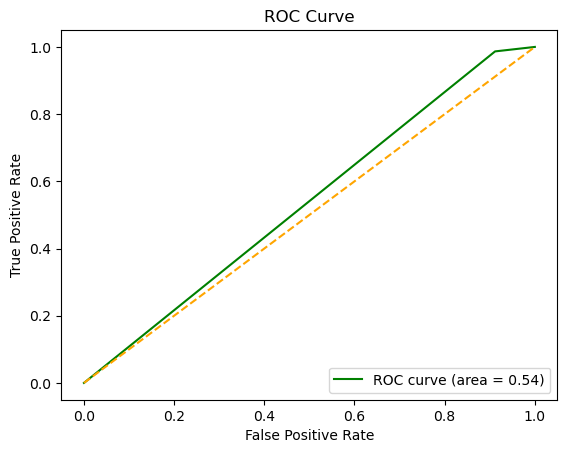

In [118]:
train_predict_evaluate(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X_train,y_train,X_test)

In [119]:
def cross_validation(model,X,Y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

In [120]:
cross_validation(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X,Y)

Accuracy:  0.7426875699888018
Precision:  0.7457575757575757
Recall:  0.7386524822695035
F1 Score:  0.7410699964523652
